In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1fiE57IGGiyFfX3D5koXN6WqtrHwX9VIS

Downloading...
From: https://drive.google.com/uc?id=1fiE57IGGiyFfX3D5koXN6WqtrHwX9VIS
To: /content/trovit.csv
100% 291k/291k [00:00<00:00, 16.9MB/s]


In [ ]:
data = pd.read_csv('trovit.csv')

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Déscription,Prix,Chambre,Douche,Terrain (m²),Type,Ville,Région,Adresse
0,Residential For Sale House Buffalo City Metrop...,650000.0,3.0,1.0,NaN,Homes,East London,Eastern Cape,Eastern Cape
1,Residential For Sale Townhouse Port ElizabethE...,2200000.0,3.0,3.0,NaN,Homes,nelson mandela bay,Nelson Mandela Bay,Nelson Mandela Bay
2,Residential For Sale House East LondonEastern ...,780000.0,2.0,1.0,NaN,Homes,East London,Eastern Cape,Eastern Cape
3,Residential For Sale Port ElizabethEastern Cap...,2200000.0,2.0,2.0,NaN,Homes,nelson mandela bay,Nelson Mandela Bay,Nelson Mandela Bay
4,8 Bedroom House in Kei Mouth,4500000.0,8.0,6.0,NaN,House,East London,Eastern Cape,Eastern Cape


## 1. Analyse de forme

- **Target :** Prix

In [ ]:
df = data.copy()

- **Lignes, colonne :**     2500, 9

In [ ]:
df.shape

(2500, 9)

- **Types de variables :**
  - **quantitative :**  4
  - **qualitative  :** 5

<Axes: >

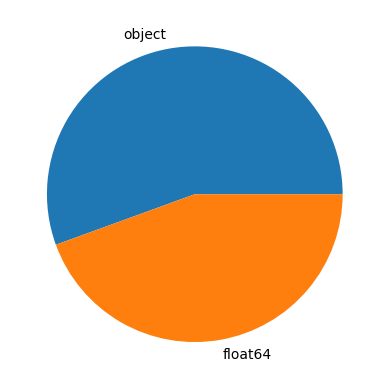

In [ ]:
df.dtypes.value_counts().plot.pie()

- **Analyse des valeurs manquantes :**
  - Seul les variables qualitatives présente des valeur NaN significative sur notre datasets
  - Prix : 0.48 % de NaN
  - Chambre : 17.56 % de NaN
  - Douche : 17.40 % de NaN
  - Terrain : 70.20 % de NaN

In [ ]:
df.isna().sum() / df.shape[0]

Déscription     0.0000
Prix            0.0048
Chambre         0.1756
Douche          0.1740
Terrain (m²)    0.7020
Type            0.0004
Ville           0.0000
Région          0.0000
Adresse         0.0000
dtype: float64

## 2. Analyse de fond

- **Visualisation de la target :**
  - La variables target a des valeurs continues
  - L'intervalle de prix est de :   [69000; 43000000]
  - La moyenne des prix est de :  1998348

In [ ]:
df['Prix'].describe()

count    2.488000e+03
mean     1.998348e+06
std      3.379618e+06
min      6.900000e+04
25%      6.500000e+05
50%      1.249500e+06
75%      2.200000e+06
max      4.300000e+07
Name: Prix, dtype: float64

- **Signification des variables :**
  - Variables quantitative
    - suivent tous une loi de distribution asymétrique
  - Les variables qualitatives
    - ne sont pas encore encodée
    - La variables 'Déscription' et 'Région' ne sont pas indispensable pour notre datasets donc on peut le supprimer
    - Chaque variables de types qualitatives a plusieur valeur disponible
    - Pour les variables 'Adresse' : tout les autres valeurs sont négligables par rapport à la valeur "Eastern Cape"
    - Pour la variable 'Type' : la valeur 'house' est supérieur à 50 % dans notre datasets
    - Pour la variable 'Ville' : les valeurs 'East London', 'Port Elisabeth' et 'Jeyffreys Bay' dominent, les autres sont distribuée de façon équitables   

<ipython-input-45-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-45-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-45-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

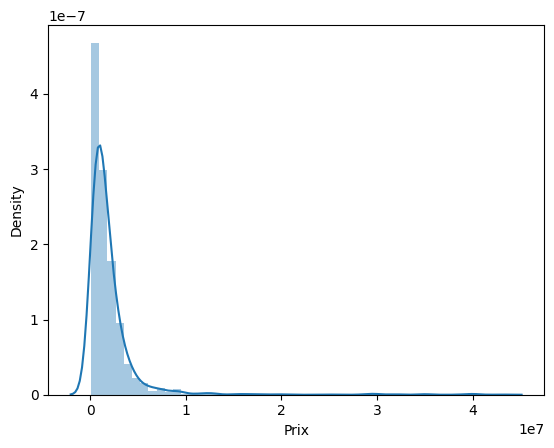

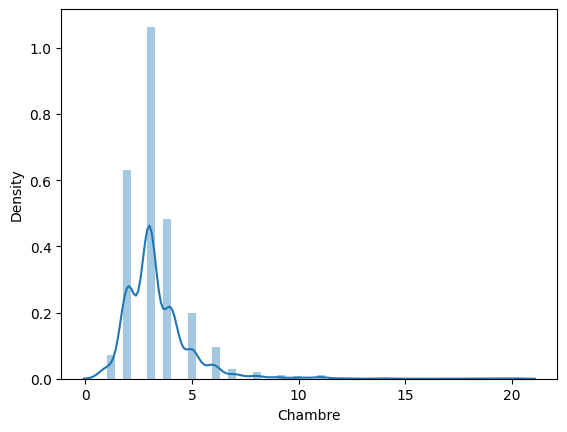

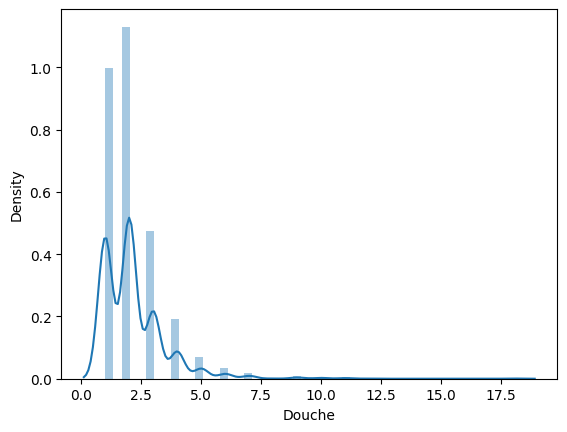

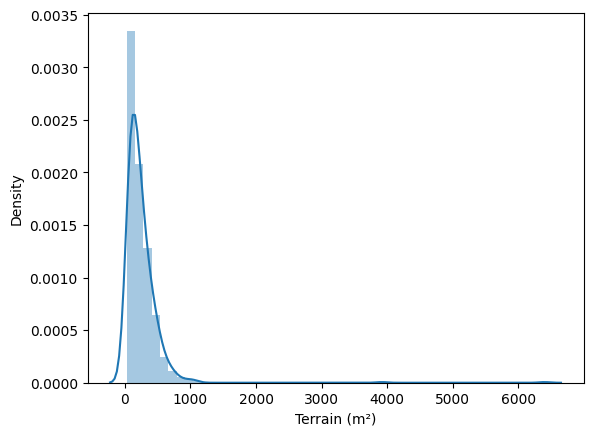

In [ ]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [ ]:
for col in df.select_dtypes('object'):
    print(col)

Déscription
Type
Ville
Région
Adresse


In [ ]:
df['Déscription']

0       Residential For Sale House Buffalo City Metrop...
1       Residential For Sale Townhouse Port ElizabethE...
2       Residential For Sale House East LondonEastern ...
3       Residential For Sale Port ElizabethEastern Cap...
4                            8 Bedroom House in Kei Mouth
                              ...                        
2495    3 Bedroom House St Francis Bay Eastern Cape Fo...
2496    Land Jeffreys Bay Eastern Cape For Sale At 462000
2497    4 Bedroom House Port Elizabeth Eastern Cape Fo...
2498    House Somerset East Eastern Cape For Sale At 1...
2499      Land East London Eastern Cape For Sale At 2300-
Name: Déscription, Length: 2500, dtype: object

In [ ]:
df = df.drop(['Déscription', 'Région'], axis=1)

In [ ]:
for col in df.select_dtypes('object'):
    print(col, len(df[col].unique()))

Type 12
Ville 61
Adresse 7


Type  :  ['Homes' 'House' 'house' 'Flat' 'land' 'Townhouse' 'Apartment' 'apartment'
 nan 'villa' 'industrial' 'farm']
Ville  :  ['East London' 'nelson mandela bay' 'Eastern Cape' 'cacadu' 'Jeffreys Bay'
 'Cape St Francis' 'Pretoria' 'joe gqabi' 'Port Alfred' 'Johannesburg'
 'Port Elizabeth' 'Boesmansriviermond' 'Alexandria' 'Bathurst' 'Uitenhage'
 'Humansdorp' 'Butterworth' 'St Francis Bay' 'Begha' 'Kenton on Sea'
 'Oesterbaai' 'Joubertina' 'Despatch' 'Paarl' 'George' 'Cathcart'
 'Grahamstown' 'Mthatha' 'Adelaide' 'Colchester' 'Bhisho' 'Middelburg'
 'Peddie' 'Bedford' 'Hogsback' 'Stutterheim' 'Queenstown'
 'Amatola Coastal' 'Thornhill' 'Tarkastad' 'Aberdeen' 'Willowmore'
 'Steynsburg' 'Elliot' 'Cradock' 'Sterkstroom' 'Komga' 'Steytlerville'
 'Graaff-Reinet' 'Kirkwood' 'Ugie' 'Jansenville' 'Somerset East'
 'Pearston' 'Seymour' 'Fort Beaufort' 'Hankey' 'Kareedouw' 'Macleantown'
 'King William’s Town' 'Port St Johns']
Adresse  :  ['Eastern Cape' 'Nelson Mandela Bay' 'King Sabata Dalindyeb

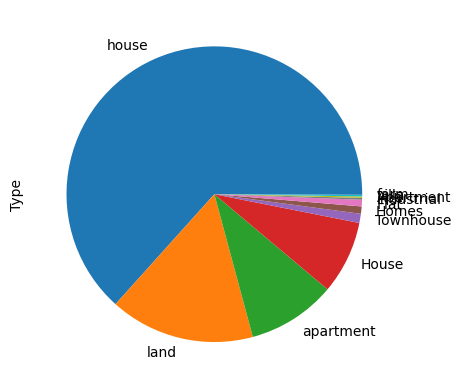

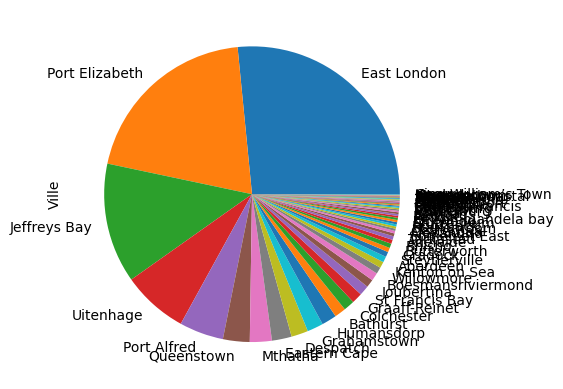

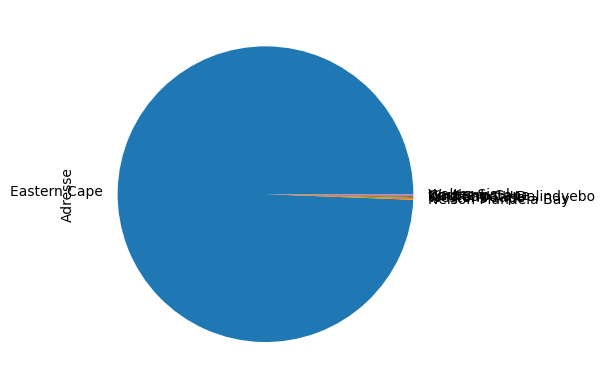

In [ ]:
#on regarde la répartition de chaque valeur des variables qualitatives
for col in df.select_dtypes('object'):
    print(col, " : ", df[col].unique())
    plt.figure()
    df[col].value_counts().plot.pie()

- **Relation Target / Variable :**

In [ ]:
#on sépare les variables quantitative et les variables qualitatitves
quantitative_df = df.select_dtypes('float')
quantitative_df = quantitative_df.drop('Prix', axis=1)

In [ ]:
qualitative_df = df.select_dtypes('object')

Target / quantitative
- Les coefficients de corrélation entre les variables quantitative et le prix sont entre 35 % et 60%
   

<Axes: >

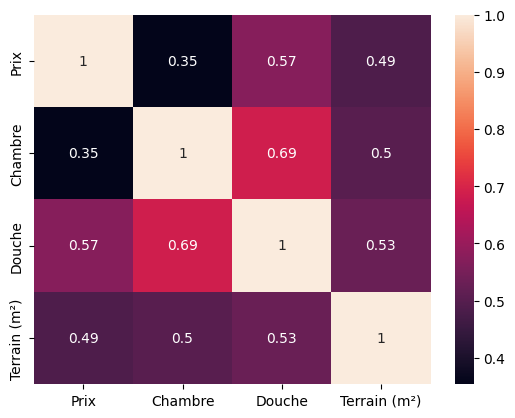

In [ ]:
sns.heatmap(df.select_dtypes('float').corr(), annot=True)

Target / qualitative
  - On peut pas établir une matrice de correlation entre nos variables qualitatif et la target 'Prix' car nos variables ne sont pas encore encoder que dans la phase de pre-processing

##Conclusion

  - Notre variables cibles est la variables "Prix"
  - Dans notre datasets, on obtient 2500 lignes et 9 colonnes avec 2 types de variables disctinct dont 5 est de types qualitatives(object) et 4 de types qualitatives(float) où est situé notre variables cibles
  - L'analyse des valeurs manquantes nous montre que seul les variables qualitatives présente des valeurs de types 'NaN' mais ne sont pas significative pour être supprimer
  - Dans l'analyse de fond, on a peu voir que la target est une variables continue dans une intervalle de valeur [69000; 43000000] et qui a une moyenne de 1998348
  - Dans l'étude de chaque catégorie de variables, on en conclut que les variables quantitatives suivent tous des lois asymétriques
  -  Dans la catégorie de variables qualitatives, on à supprimer les variables 'Déscription' et 'Région'
  - Les valeurs dans chaque variables qualitatives ont tous une infiniter de valeur qui se répartissent de façons non équilibrer
  - La relation entre les targets et les variables quantitatives se traduisent avec la coefficient de correlation entre chaque variables et le prix, on a pu voir que les coefficient de correlation est entre [0.35, 0.6]


En conclusion, on peut dire que malgrer la présence des valeur manquante dans notre datasets au niveau de variables quantitative, ils sont indispensables du fait que leur coefficient de correlation est significatives. Les variables qualitatives quant à eux, ne sont pas encore encodée mais présente beaucoup de valeur qui signifie que chaque variables varie beaucoup